In [38]:
from scipy.stats import norm, mannwhitneyu, ttest_ind
import pandas as pd
import matplotlib.pyplot as plt

In [132]:
n = 1000

sample1 = [norm.rvs(loc=0, scale=1) for i in range(n)]
sample2 = [norm.rvs(loc=0.3, scale=1) for i in range(n)]

(array([0.00429398, 0.        , 0.00429398, 0.00858795, 0.0171759 ,
        0.04723374, 0.02146988, 0.06870362, 0.10305543, 0.14599519,
        0.180347  , 0.1975229 , 0.33063616, 0.42939761, 0.35210604,
        0.38216387, 0.35210604, 0.44227954, 0.38645785, 0.24475664,
        0.180347  , 0.11164338, 0.0901735 , 0.08158555, 0.03005783,
        0.03864578, 0.02576386, 0.00858795, 0.00429398, 0.00429398]),
 array([-3.33576068, -3.1028763 , -2.86999191, -2.63710752, -2.40422313,
        -2.17133874, -1.93845435, -1.70556997, -1.47268558, -1.23980119,
        -1.0069168 , -0.77403241, -0.54114802, -0.30826364, -0.07537925,
         0.15750514,  0.39038953,  0.62327392,  0.85615831,  1.08904269,
         1.32192708,  1.55481147,  1.78769586,  2.02058025,  2.25346464,
         2.48634902,  2.71923341,  2.9521178 ,  3.18500219,  3.41788658,
         3.65077097]),
 <BarContainer object of 30 artists>)

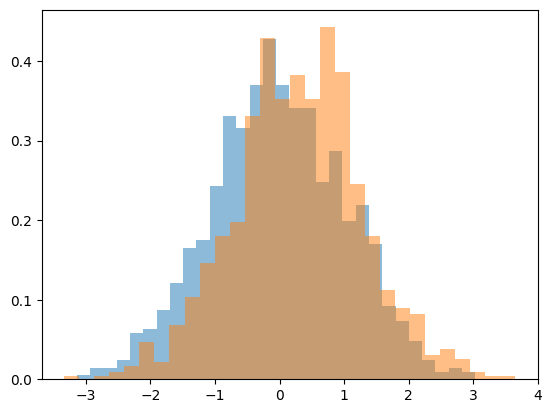

In [133]:
bins=30

plt.hist(sample1, alpha=0.5, bins=bins, density=True)
plt.hist(sample2, alpha=0.5, bins=bins, density=True)

## Тест Манна-Уитни: проверяем, взяты ли выборки из одного распределения

In [134]:
stat_mu, p_mu = mannwhitneyu(sample1, sample2, alternative='two-sided') 
print(f"U-статистика: {stat_mu}, p-значение: {p_mu}")

U-статистика: 414625.0, p-значение: 3.806310527801448e-11


## Т-тест Стьюдента: проверяем равенство средних

In [135]:
stat_tt, p_tt = ttest_ind(sample1, sample2, alternative='two-sided', equal_var=False) 
print(f"t-статистика: {stat_tt}, p-значение: {p_tt}")

t-статистика: -6.776963818212326, p-значение: 1.6102962159674937e-11


### маленькая разница средних, большая разница дисперсий

In [139]:
sample1 = [norm.rvs(loc=0, scale=1) for i in range(n)]
sample2 = [norm.rvs(loc=0.1, scale=50) for i in range(n)]

stat_mu, p_mu = mannwhitneyu(sample1, sample2, alternative='two-sided') 
print(f"U-статистика: {stat_mu}, p-значение: {p_mu}")

stat_tt, p_tt = ttest_ind(sample1, sample2, alternative='two-sided', equal_var=False) 
print(f"t-статистика: {stat_tt}, p-значение: {p_tt}")

U-статистика: 501151.0, p-значение: 0.9290063507668378
t-статистика: 0.6180692641518757, p-значение: 0.5366704496053285


### большая разница средних, большая разница дисперсий

In [146]:
sample1 = [norm.rvs(loc=0, scale=1) for i in range(n)]
sample2 = [norm.rvs(loc=4, scale=50) for i in range(n)]

stat_mu, p_mu = mannwhitneyu(sample1, sample2, alternative='two-sided') 
print(f"U-статистика: {stat_mu}, p-значение: {p_mu}")

stat_tt, p_tt = ttest_ind(sample1, sample2, alternative='two-sided', equal_var=False) 
print(f"t-статистика: {stat_tt}, p-значение: {p_tt}")

U-статистика: 472783.0, p-значение: 0.03506091364133742
t-статистика: -2.1953148122348902, p-значение: 0.028370252599072002


## Небольшой итог: оба теста плохо начинают себя вести при большой разнице в дисперсиях: распределения абсолютно разные, с разными средними (последний эксперимент), но разницу расперделений не ощущает MW, разницу средних не ощущает TT

## Калькулятор объема выборки для заданных мощностей

In [221]:
from scipy.stats import norm, uniform
import numpy as np
from math import ceil

In [162]:
n = 16
sigma = 8
mu = 100
experiments = 10000
trashold1 = 1.64  # p0.95
trashold2 = -0.86  #-p0.8

check = 0
for _ in range(experiments):
    sample = [norm.rvs(loc=mu, scale=sigma) for i in range(n)]
    if ((np.mean(sample) - mu) / sigma) * (n)**0.5 > trashold1:
        check += 1
        
check / experiments

0.0514

In [163]:
mu_alt = 105
check_alt = 0

for _ in range(experiments):
    sample = [norm.rvs(loc=mu_alt, scale=sigma) for i in range(n)]
    if ((np.mean(sample) - mu_alt) / sigma) * (n)**0.5 > trashold2:
        check_alt += 1
        
check_alt / experiments

0.8098

In [240]:
def calc_power(alfa=0.05, beta=0.8, mu=100, mu_alt=105, sigma=8):
    z_right = norm.ppf(1-alfa, 0, 1) 
    z_left = norm.ppf(1-beta, 0, 1) 
    print('Предполагаем, что дисперсия известна, и значит можно использовать ЦПТ.')
    se = (mu_alt - mu) / (z_right - z_left)
    n = (sigma / se) ** 2
    x = z_right * se + mu
    print('\nРешение:')
    print(f'При объеме выборки n={ceil(n)} вероятность отклонить H0 (mu={mu}), если она верна, равна {alfa}. Порог отклонения: {round(x, 4)}')
    print(f'При объеме выборки n={ceil(n)} вероятность принять H0 (mu={mu}), если она не верна (то есть верна H1: mu={mu_alt}), равна {round(1-beta, 2)}. Порог отклонения: {round(x, 4)}')
    return {'n': n, 'x': x}

In [241]:
calc_power()

Предполагаем, что дисперсия известна, и значит можно использовать ЦПТ.

Решение:
При объеме выборки n=16 вероятность отклонить H0 (mu=100), если она верна, равна 0.05. Порог отклонения: 103.3076
При объеме выборки n=16 вероятность принять H0 (mu=100), если она не верна (то есть верна H1: mu=105), равна 0.2. Порог отклонения: 103.3076


{'n': 15.8273465139706, 'x': 103.30760156289008}

In [242]:
calc_power(alfa=0.05, beta=0.8, mu=100, mu_alt=103, sigma=8)

Предполагаем, что дисперсия известна, и значит можно использовать ЦПТ.

Решение:
При объеме выборки n=44 вероятность отклонить H0 (mu=100), если она верна, равна 0.05. Порог отклонения: 101.9846
При объеме выборки n=44 вероятность принять H0 (mu=100), если она не верна (то есть верна H1: mu=103), равна 0.2. Порог отклонения: 101.9846


{'n': 43.964851427696104, 'x': 101.98456093773405}

In [245]:
def check_power(n=44, sigma=8, mu=100, mu_alt=103, trashold=101.9845, experiments=1000):
    check = 0
    check_alt = 0
    for _ in range(experiments):
        sample = [norm.rvs(loc=mu, scale=sigma) for i in range(n)]
        sample_alt = [norm.rvs(loc=mu_alt, scale=sigma) for i in range(n)]
        if np.mean(sample) > trashold:
            check += 1
        if np.mean(sample_alt) > trashold:
            check_alt += 1
    print(f'доля средних значений выборкок со средним mu={mu}, первышающих порог {trashold}: {check / experiments}')
    print(f'доля средних значений выборкок со средним mu={mu_alt}, первышающих порог {trashold}: {check_alt / experiments}')

check_power()

доля средних значений выборкок со средним mu=100, первышающих порог 101.9845: 0.05
доля средних значений выборкок со средним mu=103, первышающих порог 101.9845: 0.785
